In [1]:
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
sn.set_palette(palette="OrRd")

In [2]:
aisle=pd.read_csv('aisles.csv')
orderProductsTrain=pd.read_csv('order_products__train.csv')
departments=pd.read_csv('departments.csv')
products=pd.read_csv('products.csv')
orders=pd.read_csv('orders.csv')
orderProductsPrior=pd.read_csv('order_products__prior.csv')

In [3]:
orders=orders[orders['days_since_prior_order'].notnull()]

### When Do People Generally Order?

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Order Count Across Hour Of The Day')]

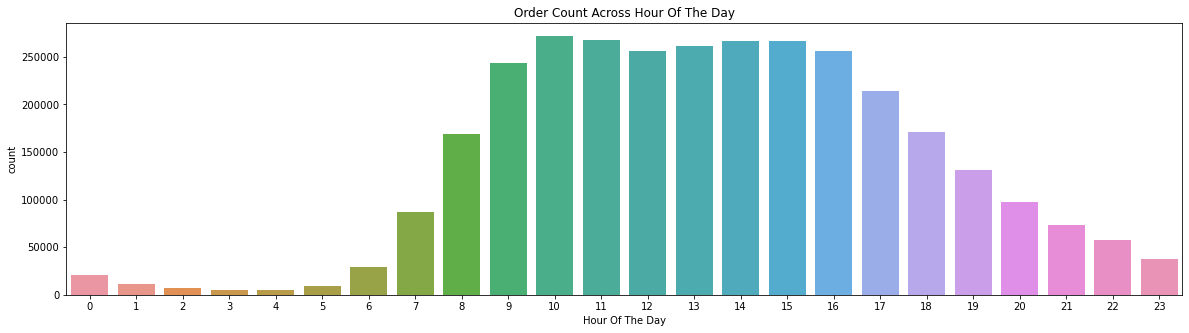

In [4]:
#When Do People Generally Order?
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sn.countplot(data=orders,x="order_hour_of_day",ax=ax)
ax.set(xlabel='Hour Of The Day',title="Order Count Across Hour Of The Day")

### At What Day of the Week People Order?

[Text(0.5, 0, 'Day Of The Week'),
 Text(0.5, 1.0, 'Order Count Across Days Of The Week')]

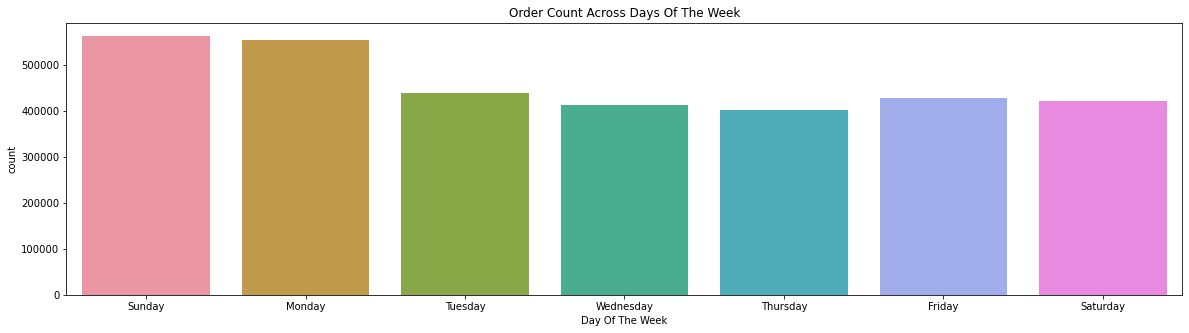

In [5]:
#At What Day Of The Week People Order?
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
ordersDay = orders[["order_dow"]].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

sn.countplot(data=ordersDay,x="order_dow",ax=ax,order=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])
ax.set(xlabel='Day Of The Week',title="Order Count Across Days Of The Week")

### When Do People Generally Reorder?

[Text(0.5, 0, 'Period of reorder'), Text(0.5, 1.0, 'Reorder Count')]

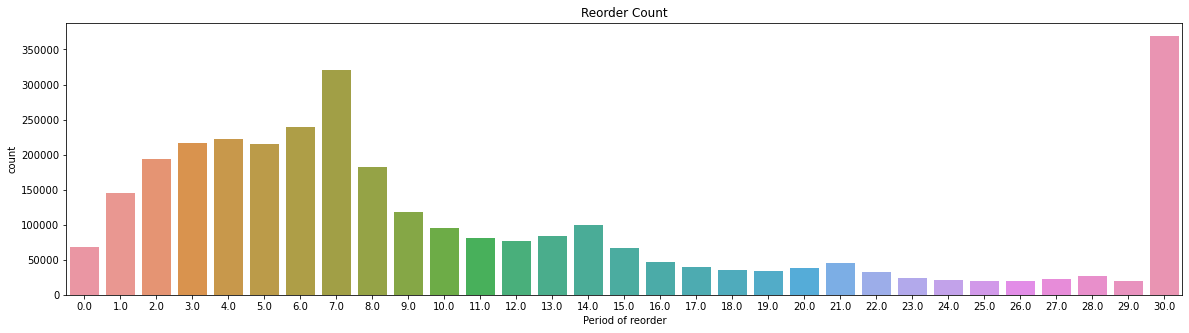

In [6]:
#When Do People Generally Reorder?
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sn.countplot(data=orders,x="days_since_prior_order",ax=ax)
ax.set(xlabel='Period of reorder',title="Reorder Count")

### How many items do people buy ?

In [7]:
#How many orders users generally made?
# orderCount = orders[orders["eval_set"]=="prior"].groupby(by=["user_id"])["order_id"].count().to_frame()
# fig,ax = plt.subplots()
# fig.set_size_inches(20,5)
# sn.countplot(data=orderCount,x="order_id",ax=ax)
# ax.set(xlabel='Order Count',title="Order Count")

[Text(0.5, 0, 'Order Count'), Text(0.5, 1.0, 'Count Of Items People Buy')]

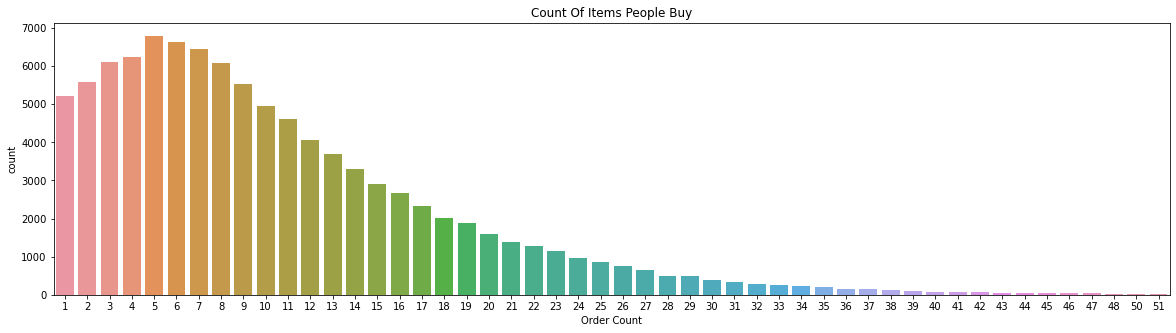

In [8]:
#How many items do people buy In Prior and Train?
fig,ax1= plt.subplots()
fig.set_size_inches(20,5)
orderTrain = orderProductsTrain.groupby("order_id")["product_id"].count().to_frame()["product_id"].value_counts().to_frame()
orderTrain["count"] = orderTrain["product_id"]
orderTrain["no_of_products"] = orderTrain.index
sn.barplot(data=orderTrain.head(50),x="no_of_products",y="count",ax=ax1)
ax1.set(xlabel='Order Count',title="Count Of Items People Buy")


### Best Selling Products

,product_id,count,product_name,aisle_id,department_id
0,24852,14136,Banana,24,4
1,13176,11639,Bag of Organic Bananas,24,4
2,21137,8233,Organic Strawberries,24,4
3,21903,7443,Organic Baby Spinach,123,4
4,47626,6148,Large Lemon,24,4
5,47766,5606,Organic Avocado,24,4
6,47209,5489,Organic Hass Avocado,24,4
7,16797,4920,Strawberries,24,4
8,26209,4609,Limes,24,4
9,27966,4200,Organic Raspberries,123,4


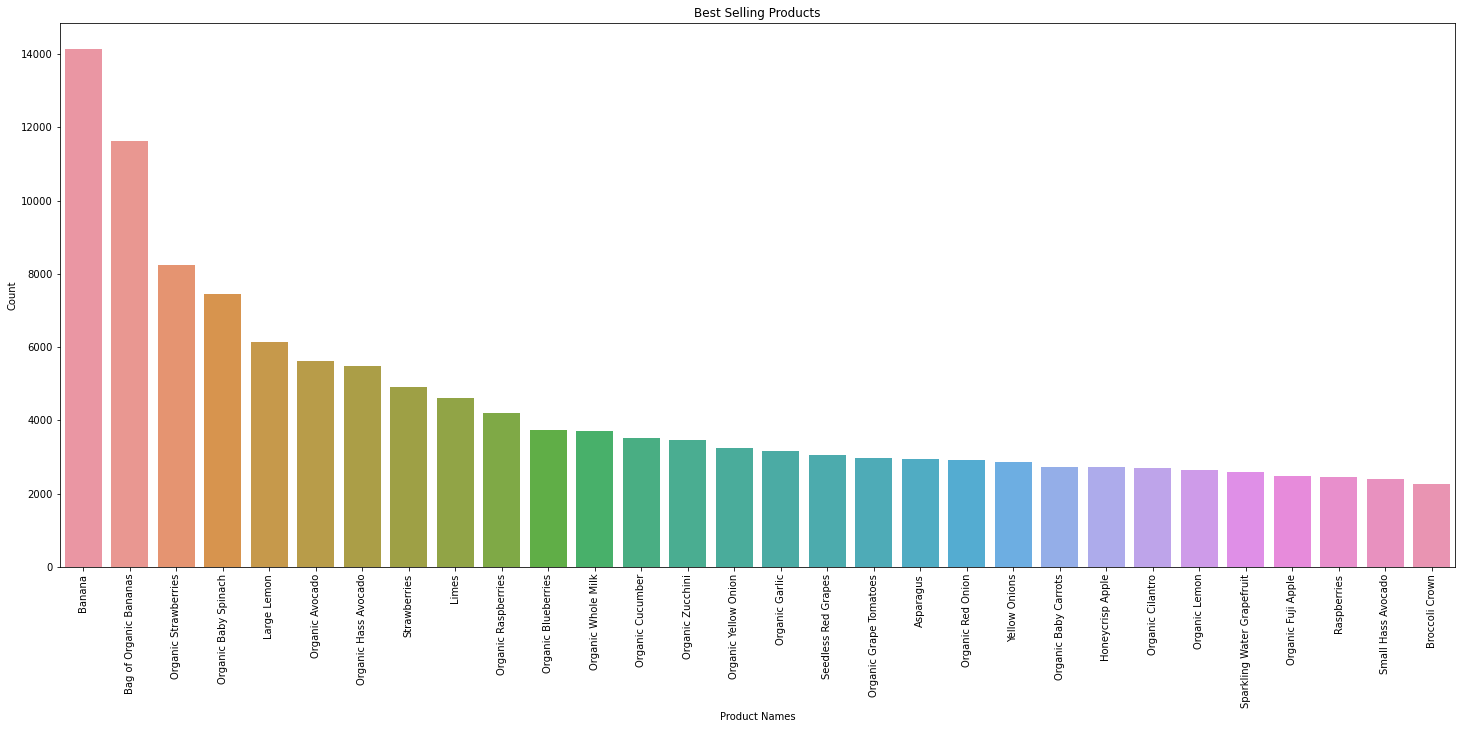

In [9]:
#Best Selling Products
productsCount = orderProductsTrain["product_id"].value_counts().to_frame()
productsCount["count"] = productsCount.product_id
productsCount["product_id"] = productsCount.index
mergedData = pd.merge(productsCount,products,how="left",on="product_id").sort_values(by="count",ascending=False)
fig,ax = plt.subplots()
fig.set_size_inches(25,10)
sn.barplot(data=mergedData.head(30),x="product_name",y="count",ax=ax,orient="v")
ax.set(xlabel='Product Names',ylabel="Count",title="Best Selling Products")
plt.xticks(rotation=90)
mergedData.head(10)

### Top Reordered Products

,product_id,count,reordered_count,reordered_ratio,product_name,aisle_id,department_id
4465,1729,75,69.0,0.920000,2% Lactose Free Milk,84,16
4477,36717,57,52.0,0.912281,Double Fiber Bread,112,3
4485,20940,285,258.0,0.905263,Organic Low Fat Milk,84,16
4486,11885,51,46.0,0.901961,"Sparkling Water, Bottles",115,7
4512,21038,64,57.0,0.890625,Organic Spelt Tortillas,128,3
4550,39180,373,330.0,0.884718,Organic Lowfat 1% Milk,84,16
4554,24852,14136,12461.0,0.881508,Banana,24,4
4555,24024,336,296.0,0.880952,1% Lowfat Milk,84,16
4558,1402,58,51.0,0.879310,Plain Soymilk Creamer,91,16
4560,29447,433,380.0,0.877598,"Milk, Organic, Vitamin D",84,16


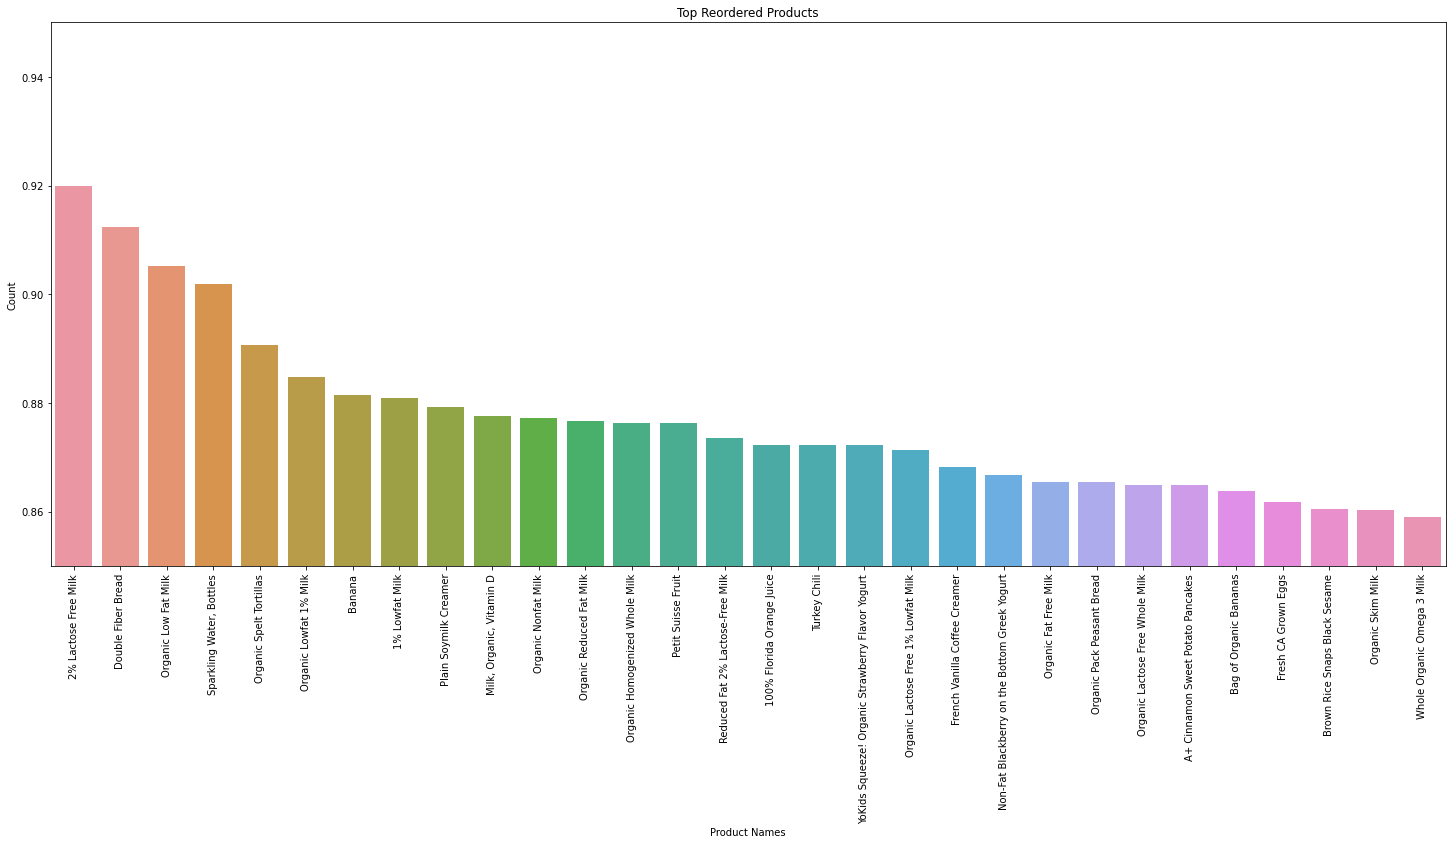

In [10]:
#Top Reordered Products
productsReordered = orderProductsTrain[orderProductsTrain["reordered"]==1]["product_id"].value_counts().to_frame()
productsReordered["reordered_count"] = productsReordered.product_id
productsReordered["product_id"] = productsReordered.index
ReorderedMerged = pd.merge(productsCount,productsReordered,how="left",on="product_id").sort_values(by="count",ascending=False)
ReorderedMerged["reordered_ratio"] = ReorderedMerged["reordered_count"]/ReorderedMerged["count"]
ReorderedMerged.sort_values(by="reordered_ratio",ascending=False,inplace=True)
productMerged = pd.merge(ReorderedMerged,products,how="left",on="product_id")

fig,ax = plt.subplots()
fig.set_size_inches(25,10)
sn.barplot(data=productMerged[productMerged["count"]>40].head(30),x="product_name",y="reordered_ratio",ax=ax,orient="v")
ax.set(xlabel='Product Names',ylabel="Count",title="Top Reordered Products")
ax.set_ylim(0.85,.95)
plt.xticks(rotation=90)

productMerged[productMerged["count"]>40].head(10)


### Which item do people put into the cart first?

,product_id,count,reordered_count,first_ordered_ratio,product_name,aisle_id,department_id
880,45004,40,27.0,0.675000,White Multifold Towels,54,17
980,34568,11,7.0,0.636364,Bourbon Kentucky Frontier Whiskey,124,5
981,11885,51,32.0,0.627451,"Sparkling Water, Bottles",115,7
984,13128,16,10.0,0.625000,Purified Alkalkine Water with Minerals pH10,115,7
1002,13855,12,7.0,0.583333,NyQuil Severe Cold & Flu and DayQuil Severe Co...,11,11
1017,17339,11,6.0,0.545455,Original Berry Flavor Dye-Free Children's,133,11
1018,48339,13,7.0,0.538462,Lobster Tails,39,12
1019,31141,13,7.0,0.538462,Old Tyme 100% Whole Grain White Wheat Sliced B...,112,3
1020,34148,13,7.0,0.538462,Variety of Anitoxidant Infusions Cans,64,7
1021,1993,13,7.0,0.538462,Cheesecake,8,3


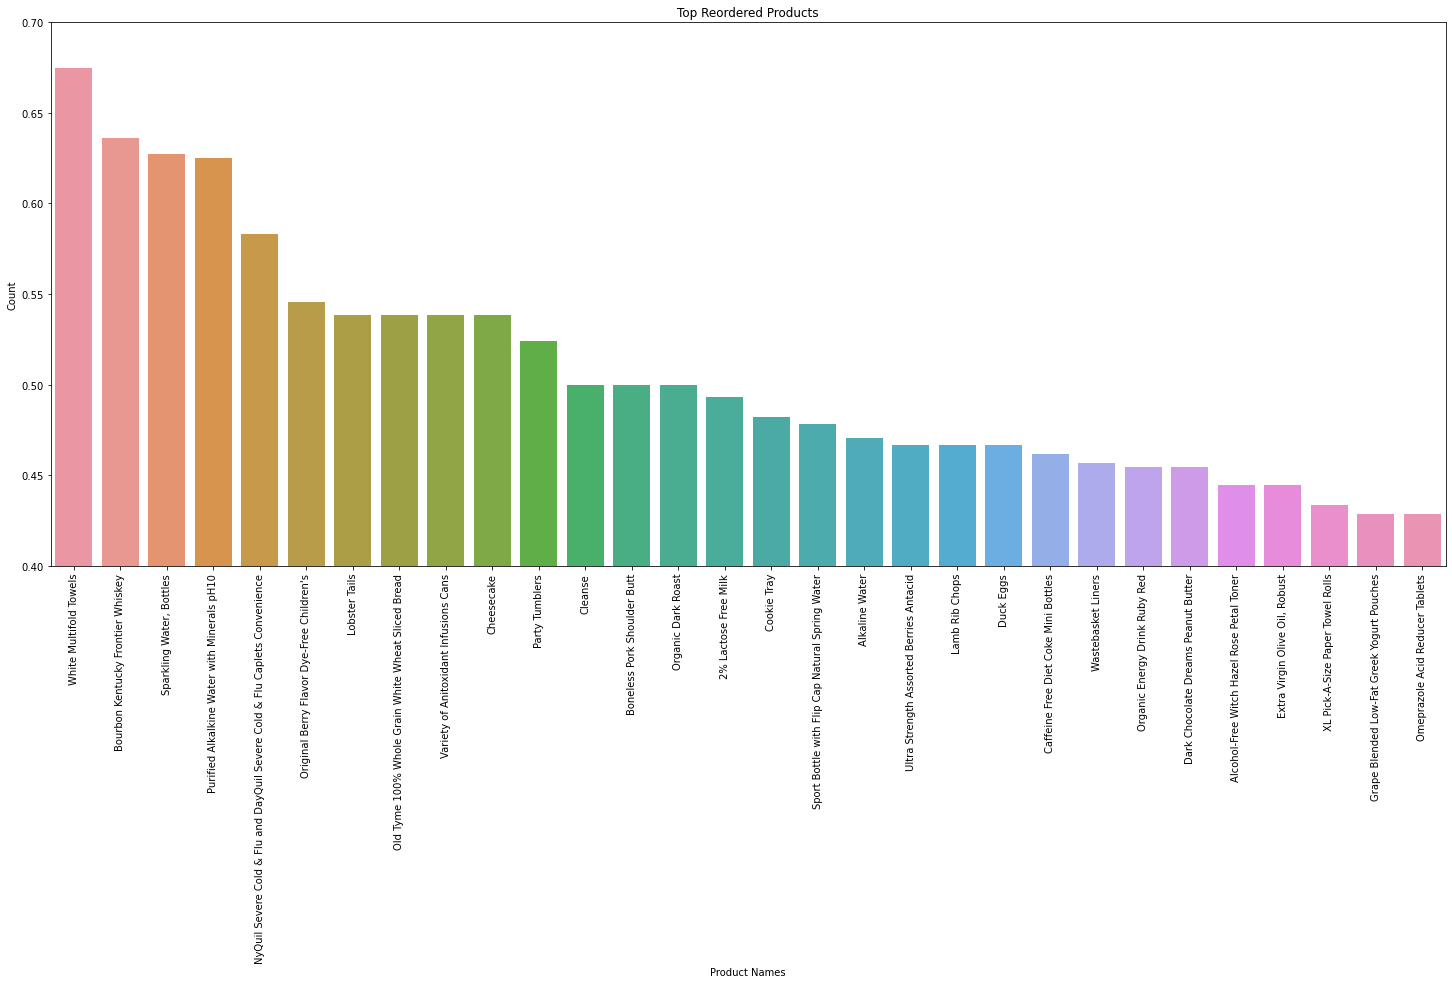

In [11]:
#Which item do people put into the cart first?
productsCountFirst = orderProductsTrain[orderProductsTrain["add_to_cart_order"]==1]["product_id"].value_counts().to_frame()
productsCountFirst["reordered_count"] = productsCountFirst.product_id
productsCountFirst["product_id"] = productsCountFirst.index
productCountFirstMerged = pd.merge(productsCount,productsCountFirst,how="left",on="product_id").sort_values(by="count",ascending=False)
productCountFirstMerged["first_ordered_ratio"] = productCountFirstMerged["reordered_count"]/productCountFirstMerged["count"]
productCountFirstMerged.sort_values(by="first_ordered_ratio",ascending=False,inplace=True)
firstMerged = pd.merge(productCountFirstMerged,products,how="left",on="product_id")


fig,ax = plt.subplots()
fig.set_size_inches(25,10)
sn.barplot(data=firstMerged[firstMerged["count"]>10].head(30),x="product_name",y="first_ordered_ratio",ax=ax,orient="v")
ax.set(xlabel='Product Names',ylabel="Count",title="Top Reordered Products")
ax.set_ylim(0.4,.7)
plt.xticks(rotation=90)

firstMerged[firstMerged["count"]>10].head(10)